<a href="https://colab.research.google.com/github/gurnish-singh/machine-learning/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
fashion=tf.keras.datasets.fashion_mnist
print(tf.__version__)

we can try other differnt datasets from keras

4423680/4422102 [==============================] - 0s 0us/step
2


'print(train_images[5]) will show the pixel values'

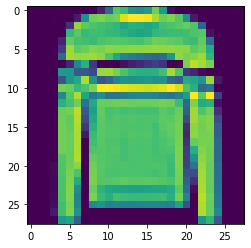

In [0]:
import matplotlib.pyplot as plt
(train_images,train_labels),(test_images,test_labels)=fashion.load_data()
plt.imshow(train_images[5])
print(train_labels[5])
"""print(train_images[5]) will show the pixel values"""


In [0]:
train_images=train_images/255;
test_images=test_images/255;
""" normalization"""

' normalization'

In [0]:
model= tf.keras.models.Sequential([ 
                                   tf.keras.layers.Flatten(
                                       #input_shape=(28,28)
                                       ),
                        tf.keras.layers.Dense(256, activation=tf.nn.relu),
                        tf.keras.layers.Dense(128, activation=tf.nn.relu),
                        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                        ])

""" input layer has shape (28,28)"""
 """ first hidden layer has 128 units and relu activation function"""
  """second layer has 10 units and softmax activation function"""

In [0]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy')


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.30):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True


In [0]:
callbacks=myCallback()

In [0]:
model.fit(train_images,train_labels,epochs=5,callbacks=[callbacks])


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3371
Epoch 2/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3277
Epoch 3/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3190
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3110
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3045


In [0]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3591


0.35912702589035034

In [0]:
classifications = model.predict(test_images)

in the fashion dataset we have 10 lables ranging from 0-9
model.predict() gives us the probability for every label

In [0]:
print(classifications[0])

[4.8992610e-05 6.2067484e-06 3.9438593e-05 1.8040830e-05 9.8316395e-06
 1.7766746e-02 6.4015585e-05 8.8985831e-02 1.0614713e-03 8.9199942e-01]


In [0]:
print(test_labels[0])

9
